In [1]:
import tensorflow as tf
import numpy as np

/Users/jeremy.zhang/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# tf.enable_eager_execution()

In [11]:
a = tf.constant([[1, 1, 1], [1, 2, 3]])
a

<tf.Tensor: id=21, shape=(2, 3), dtype=int32, numpy=
array([[1, 1, 1],
       [1, 2, 3]], dtype=int32)>

In [13]:
tf.slice(a, begin=[1, 1], size=[1, 2])  # begin is the (row, col) index size is how long to slice {-1 means all}

<tf.Tensor: id=27, shape=(1, 2), dtype=int32, numpy=array([[2, 3]], dtype=int32)>

In [16]:
tf.random_shuffle(a)

<tf.Tensor: id=33, shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [1, 1, 1]], dtype=int32)>

In [26]:
x = tf.constant([[1, 1, 1], [1, 1, 1]]) # (2, 3)
tf.reduce_sum(x) # 6

<tf.Tensor: id=79, shape=(), dtype=int32, numpy=6>

In [28]:
tf.reduce_sum(x, 0)  # [2, 2, 2]

<tf.Tensor: id=82, shape=(3,), dtype=int32, numpy=array([2, 2, 2], dtype=int32)>

### Kmeans

In [3]:
n_points = 100
n_clusters = 3
n_iter = 10

#### randomly choose inital center

In [4]:
points = tf.constant(np.random.uniform(0, 10, [n_points, 2]))
centroids = tf.Variable(tf.slice(tf.random_shuffle(points), [0, 0], [n_clusters, 2]))

print(centroids)

<tf.Variable 'Variable:0' shape=(3, 2) dtype=float64_ref>


In [5]:
points_expanded = tf.expand_dims(points, 0)
print(points_expanded.shape)

centroids_expanded = tf.expand_dims(centroids, 1)
print(centroids_expanded.shape)

(1, 100, 2)
(3, 1, 2)


#### calculate distance between points and centroid to determine assgnmnets

In [25]:
print(tf.subtract(points_expanded, centroids_expanded).shape)

(3, 100, 2)


In [6]:
distances = tf.reduce_sum(tf.square(tf.subtract(points_expanded, centroids_expanded)), 2)
assignments = tf.arg_min(distances, 0)  # along 0 axis the smallest
print(assignments[:10])

Instructions for updating:
Use `argmin` instead
Tensor("strided_slice:0", shape=(10,), dtype=int64)


In [39]:
means = []
for c in range(n_clusters):
    cluster_points = tf.gather(points, tf.squeeze( tf.where(tf.equal(assignments, c)) ))
    cent = tf.reduce_mean(cluster_points, axis=0)
    means.append(cent)
new_centroids = tf.squeeze(tf.stack(means))
update_centoids = tf.assign(centroids, new_centroids)
update_centoids

<tf.Tensor 'Assign_6:0' shape=(3, 2) dtype=float64_ref>

#### Run

In [54]:
import time
st = time.time()

points = tf.constant(np.random.uniform(0, 10, [n_points, 2]))
centroids = tf.slice(tf.random_shuffle(points), [0, 0], [n_clusters, 2])

points_expanded = tf.expand_dims(points, 0)
print(points_expanded.shape)

centroids_expanded = tf.expand_dims(centroids, 1)
print(centroids_expanded.shape)

distances = tf.reduce_sum(tf.square(tf.subtract(points_expanded, centroids_expanded)), 2)
assignments = tf.arg_min(distances, 0)  # along 0 axis the smallest

means = []
for c in range(n_clusters):
    cluster_points = tf.gather(points, tf.squeeze( tf.where(tf.equal(assignments, c)) ))
    cent = tf.reduce_mean(cluster_points, axis=0)
    means.append(cent)
new_centroids = tf.squeeze(tf.stack(means))
# update_centroids = tf.assign(centroids, new_centroids)
centroids = new_centroids

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(100):
        # [_, centroid_values, points_values, assignment_values] = sess.run([update_centroids, centroids, points, assignments])
        assignments_values = sess.run(assignments)
        
print("centroids" + "\n", centroid_values)

print("total time:", time.time()-st)

(1, 100, 2)
(3, 1, 2)
centroids
 [[8.16709214 7.10900729]
 [4.60083907 2.10579895]
 [3.0306128  7.2940947 ]]
total time: 0.0902547836303711


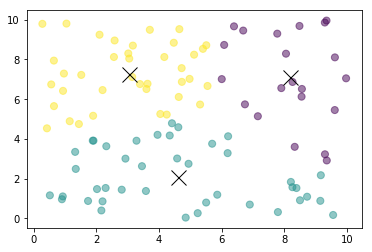

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(points_values[:, 0], points_values[:, 1], c=assignment_values, s=50, alpha=0.5)
plt.plot(centroid_values[:, 0], centroid_values[:, 1], 'kx', markersize=15)
plt.show()